## TP2
### Vision por computadora 1
#### Marcelo Chichiri

▪ Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para 
filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada 
de Fourier.
1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una 
imagen para validar el funcionamiento en el dominio espectral. 
2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency 
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.
3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of 
focus measure operators in shape-from-focus”

### Desarrolloo del TP

In [1]:
# Carga de librerías
import warnings
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
warnings.filterwarnings('ignore')

#### Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.

In [3]:
# Filtro Gaussiano
# h, w : Es el alto y ancho de la imagen. h, w = img.shape
# k_size: Es el tamaño del kernel. Por ej. k_size=5 es un kernel de 5x5
# sigma: Es la desviación standard que se aplica en el filtro
# Devuelve : El filtro gaussiano calculado y su transformada de Fourier

def create_gauss_filter(h, w, k_size:5, sigma:5): 
    # Se crea una matriz de ceros con las dimensiones de la imagen
    mascara = np.zeros((h, w))

    # El punto medio de la imagen se pone en 255 
    mascara[h//2,w//2] = 1    
    # Uso la funcion de OpenCV para obtener el filtro gaussiano
    # 
    filtro_gaussiano = cv.GaussianBlur(mascara, (k_size, k_size), sigma)
    
    # APlico al Transformada Rápida de Fourier al filtro gaussiano 
    filtro_gaussiano_fft = np.fft.fft2(filtro_gaussiano)
    
    return filtro_gaussiano, filtro_gaussiano_fft

#### 1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro a una imagen para validar el funcionamiento en el dominio espectral.

In [4]:
# Graficación de imágenes
# k : Es el tamaño del kernel. Por ej. k_size=5 es un kernel de 5x5
# s : Es la desviación standard que se aplica en el filtro
# imagen: Es el archivo de imagen
# nombre_imagen: Es el nombre la imagen a presentar
#
def graficar_imagen(k=1, s=1, imagen='', nombre_imagen=''):
        # Toma el tamaño de la imagen
        h, w = imagen.shape
        # Calcula el filtro gaussiano
        kernel, kernel_tf = create_gauss_filter(h, w, k_size=k, sigma=s)
        
        # Muestra imagen original 
        plt.figure(figsize=(20, 20))
        plt.subplot(1,4,1)
        plt.axis('off')
        plt.title(f'Imagen original \n {nombre_imagen}')
        plt.imshow(imagen_original, cmap='gray')
        
        # Muestra kernel gaussiano
        plt.subplot(1,4,2)
        plt.axis('off')
        plt.title(f'Kernel Gaussiano \nTamaño filtro:{k}, Sigma:{s}')
        plt.imshow(kernel, cmap='jet')
        
        # Muestra Transformada de Fourier del kernel gaussiano        
        plt.subplot(1,4,3)
        plt.axis('off')
        plt.title(f'FFT del kernel Gaussiano \nTamaño filtro:{k}, Sigma:{s}')
        plt.imshow(np.abs(kernel_tf), cmap='jet')
        
        # Calcula el desenfoque gaussiano a partir del 
        img_fft = np.fft.fft2(imagen_original)
        filtered = img_fft * kernel_tf

        img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

        # Muestra imagen con el desenfoque gaussiano aplicado   
        plt.subplot(1,4,4)
        plt.imshow(img_gauss, cmap='gray')
        plt.title(f'Desenfoque Gausiano \nTamaño:{k}, Sigma:{s}')
        return

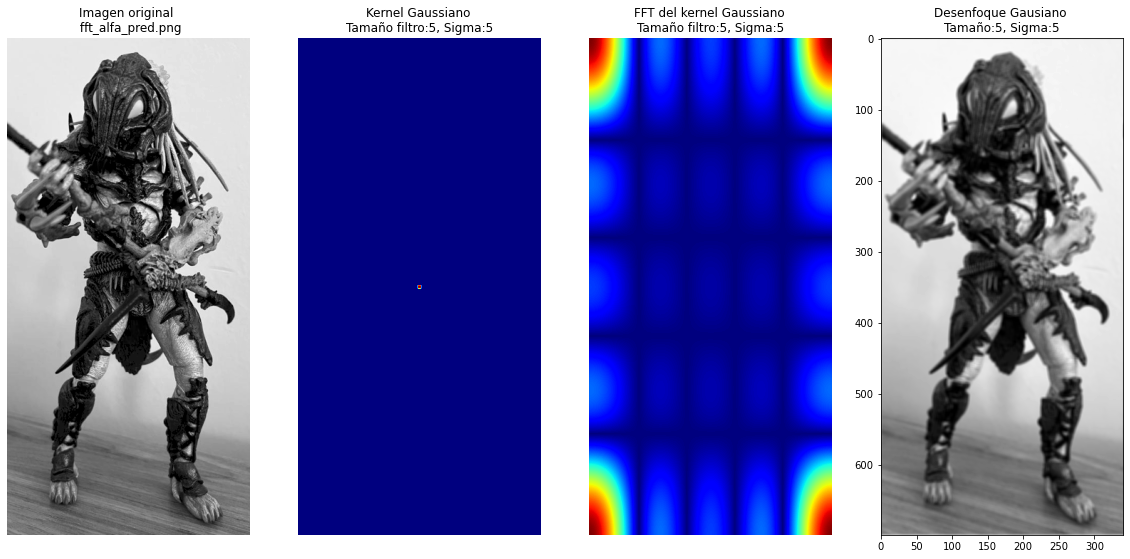

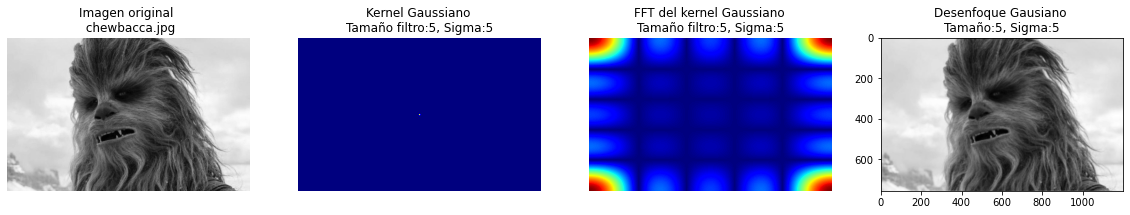

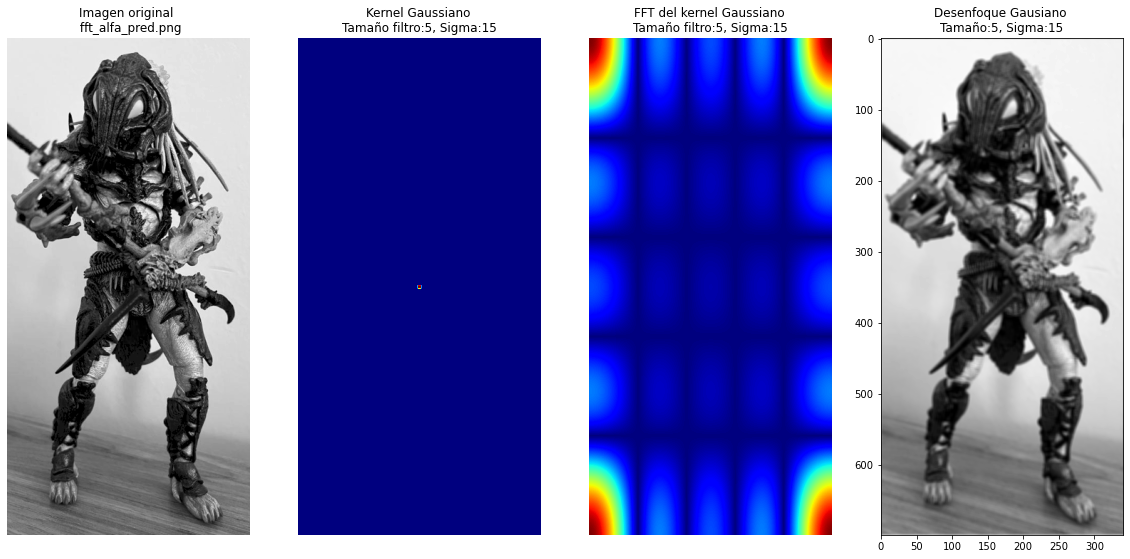

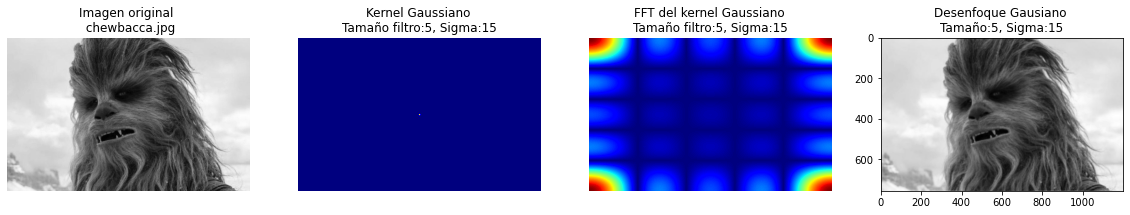

In [5]:
imagenes_cc =  ['fft_alfa_pred.png',
                'chewbacca.jpg']

# Se grafican las imagenes con un k=5 (5x5) y un sigma de 5 y de 15
k = 5
for s in [5, 15]:
    for i in range(2):
        # Leo la imagen en escala de grices
        imagen_original = cv.imread(imagenes_cc[i], cv.IMREAD_GRAYSCALE)
        # Presento las imágenes (original, kernel gaussiano, FFT del kernel gaussiano y la imagen con filtro aplicado)
        graficar_imagen(k=k, s=s, imagen=imagen_original, nombre_imagen=imagenes_cc[i] )

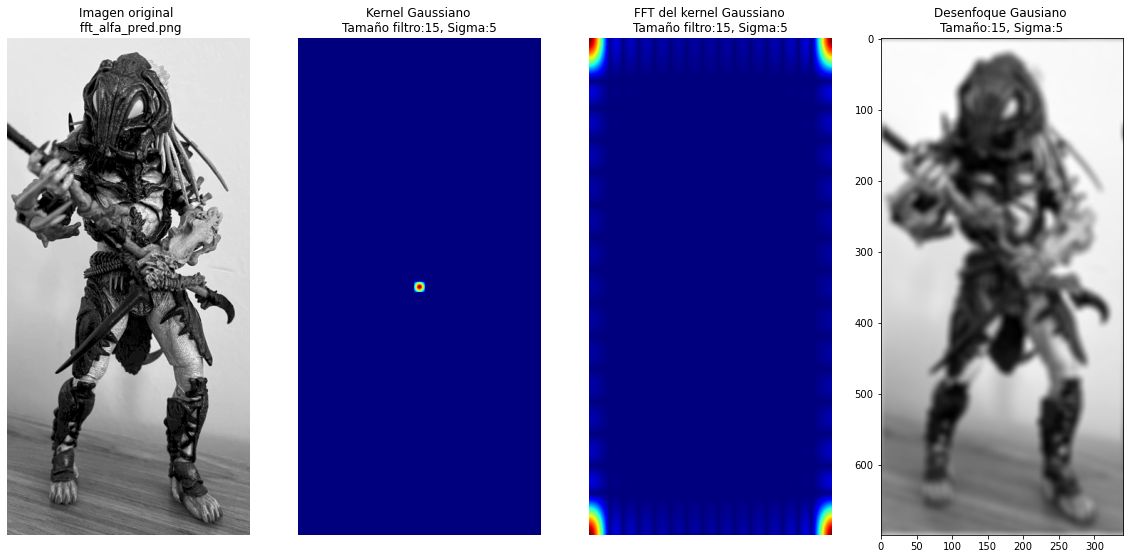

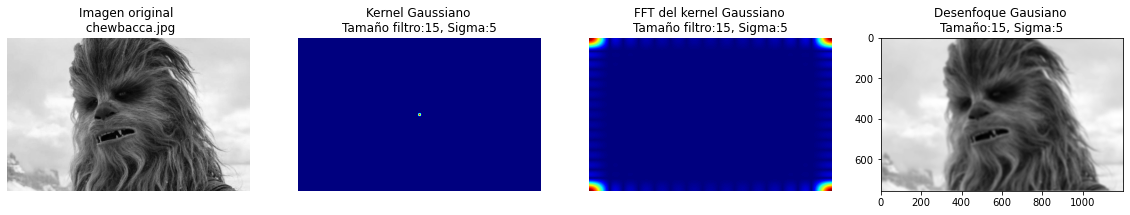

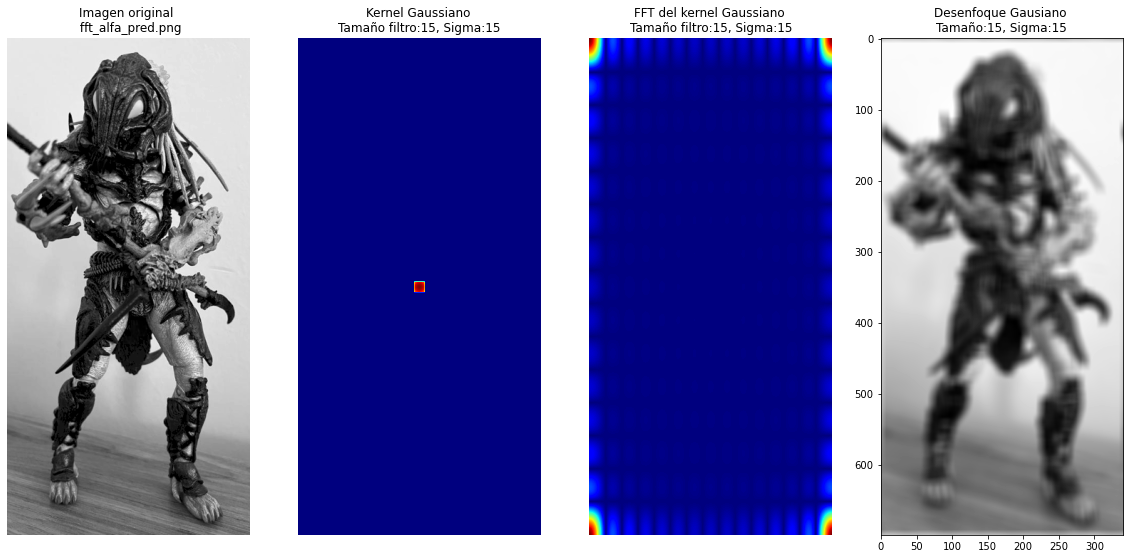

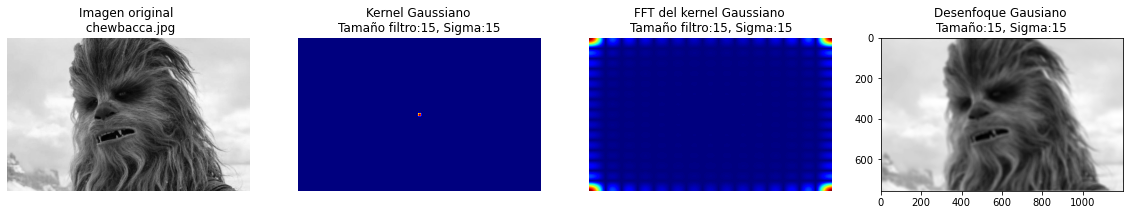

In [6]:
# Se grafican las imagenes con un k=15 (15x15) y un sigma de 5 y de 15
k = 15
for s in [5, 15]:
    for i in range(2):
        # Leo la imagen en escala de grices
        imagen_original = cv.imread(imagenes_cc[i], cv.IMREAD_GRAYSCALE)
        # Presento las imágenes (original, kernel gaussiano, FFT del kernel gaussiano y la imagen con filtro aplicado)
        graficar_imagen(k=k, s=s, imagen=imagen_original, nombre_imagen=imagenes_cc[i] )

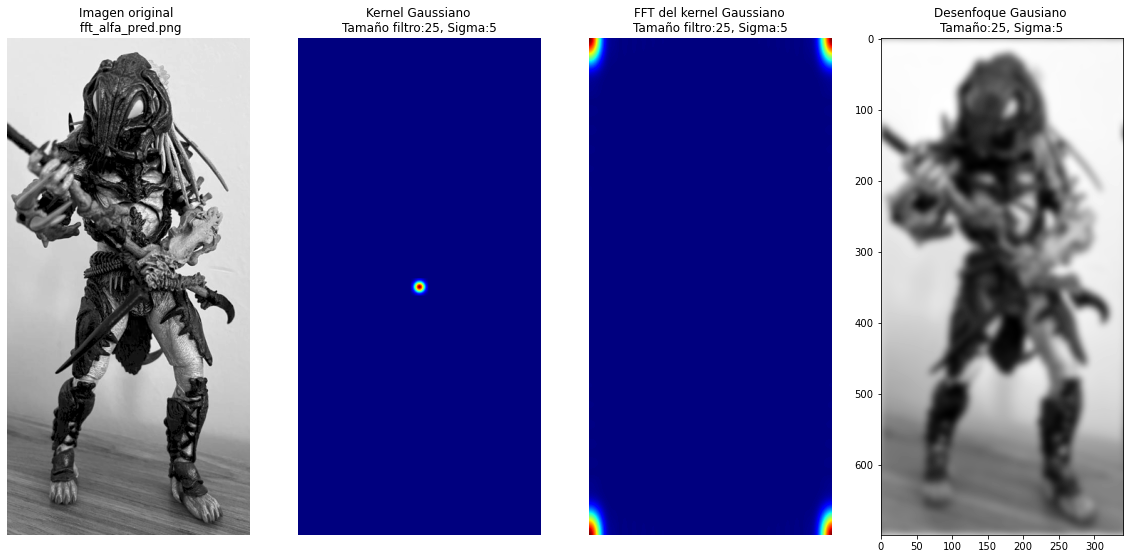

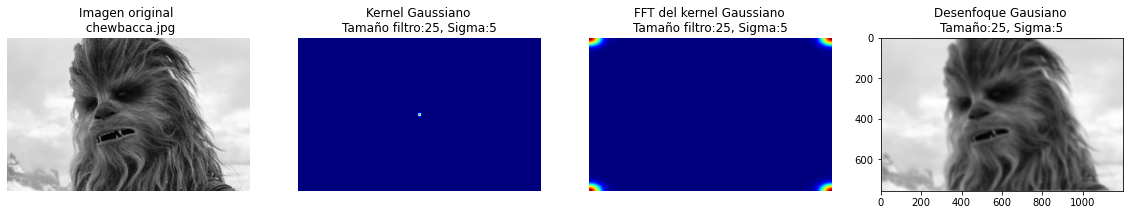

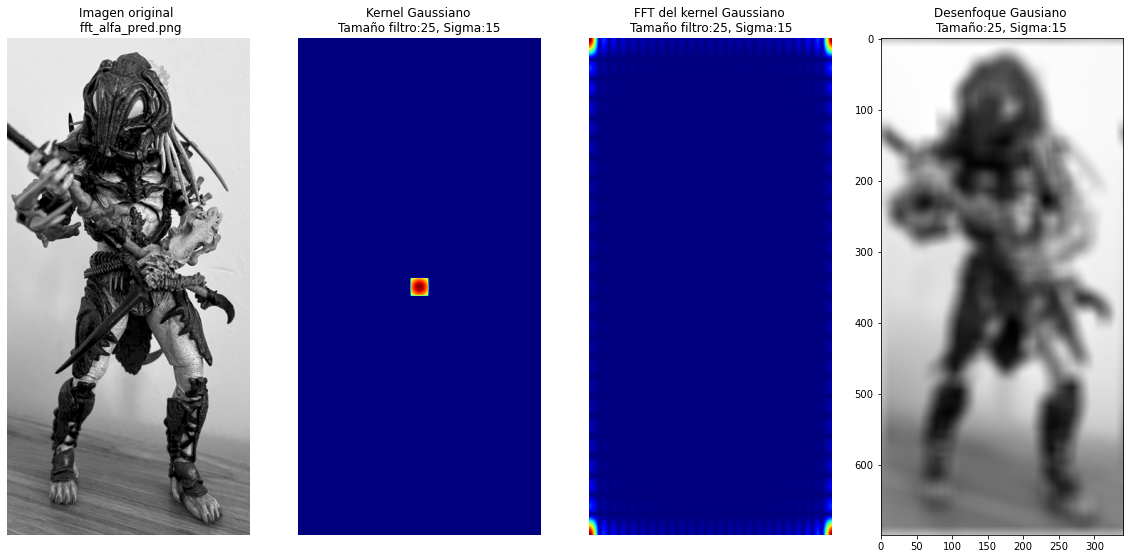

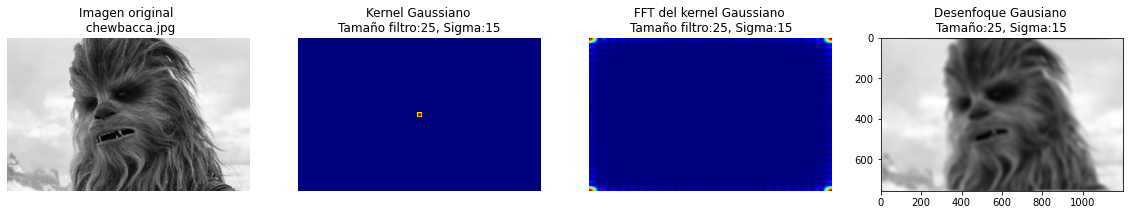

In [7]:
# Se grafican las imagenes con un k=25 (25x25) y un sigma de 5 y de 15
k = 25
for s in [5, 15]:
    for i in range(2):
        # Leo la imagen en escala de grices
        imagen_original = cv.imread(imagenes_cc[i], cv.IMREAD_GRAYSCALE)
        # Presento las imágenes (original, kernel gaussiano, FFT del kernel gaussiano y la imagen con filtro aplicado)
        graficar_imagen(k=k, s=s, imagen=imagen_original, nombre_imagen=imagenes_cc[i] )

#### Resultados y conclusiones punto 1

En este punto se ve que es posible difuminar una imagen por medio de la multiplicación de la imagen (convertida al dominio de frecuencias) con un filtro gaussiano en el dominio espectral o de frecuencia, y que el grado de borrosidad puede ser modificado por medio de un parámetro k (k indica el tamaño del kernel, k x k) y de un parámetro sigma (que indica la desviación estándar del núcleo gaussiano en la dirección X).

#### 2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.

#### Algorithm for calculating Image Quality measure 

Para calcula esta métrica se fija un valor de umbral (M/1000, donde M es la máxima frecuencia en la Transformada de Fourier de la imagen original) de alta frecuencia, luego se calcula el número de componentes de alta frecuencia por encima del valor de umbral que finalmente se utiliza para calcular la puntuación de calidad de imagen. Una imagen más nítida y de buena calidad tendrá un mayor número de componentes de alta frecuencia en comparación con una imagen borrosa. La ecuación se normaliza dividiendo por la cantidad de pixeles en la imagen.

Input: Image I of size M×N. \
Output: Image Quality measure (FM) where FM stands for Frequency Domain Image Blur Measure


Step 1: Compute F which is the Fourier Transform representation of image I \
Step 2: Find Fc which is obtained by shifting the origin of F to centre. \
 Step 3: Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier transform of image I. \
 Step 4: Calculate M = max (AF) where M is the maximum value of the frequency component in F. \
Step 5: Calculate TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000.\
Step 6: Calculate Image Quality measure (FM) from equation FM=TH/(MxN).

Nota : La variable M, del Step 5 (thres = M/1000), presenta una ambiguedad en el paper, ya que esta variable, por un lado, es el máximo valor de frecuencia (calculado en el Step 4), pero también se indica que M es la cantidad de filas de la matriz de la imagen (Image I of size M×N). Para el algoritmo se entiende que la variable M del Step 5 es la calculada en el Step 4 (M = máximo valor de frecuencia enla transformada de Fourier de la imagen).

In [8]:
def image_quality_measure(imagen):
    h, w  = imagen.shape # np.shape(imagen)
    # Step 1: Compute F which is the Fourier Transform representation of image I
    F = np.fft.fft2(imagen)
    # Step 2: Find Fc which is obtained by shifting the origin of F to centre. 
    Fc =  np.fft.fftshift(F)
    # Step 3: Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier transform of image I.
    AF = np.abs(Fc)
    # Step 4: Calculate M = max (AF) where M is the maximum value of the frequency component in F.
    M = np.max(AF)
    # Step 5: Calculate TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000.
    Th = np.count_nonzero(F > (M/1000))
    # Step 6: Calculate Image Quality measure (FM) from equation image_quality_measure=Th/(M * N).
    return (Th/(h * w))

In [9]:
# Se prepara un dataframe para guardar los datos de cada modelo y poder comparar los resultados
# Nombre : Es el nombre del archivo de imagen
# Imagen : Es la matriz del archivo de imagen
# Convolucion : Es la imagen difuminada (Blurred) por convolucion
# fft : es la imagen difuminada (Blurred) en el dominio espectral
# IQM_Conv : es la metrica image_quality_measure de la imagen difuminada (Blurred) por convolucion
# IQM_gauss : es la metrica image_quality_measure de la imagen difuminada (Blurred) por fft

df_imagenes = pd.DataFrame([], columns=['Nombre','Imagen', 'Convolucion', 'fft', 
                                        'IQM_Original', 'IQM_Conv', 'IQM_gauss'])

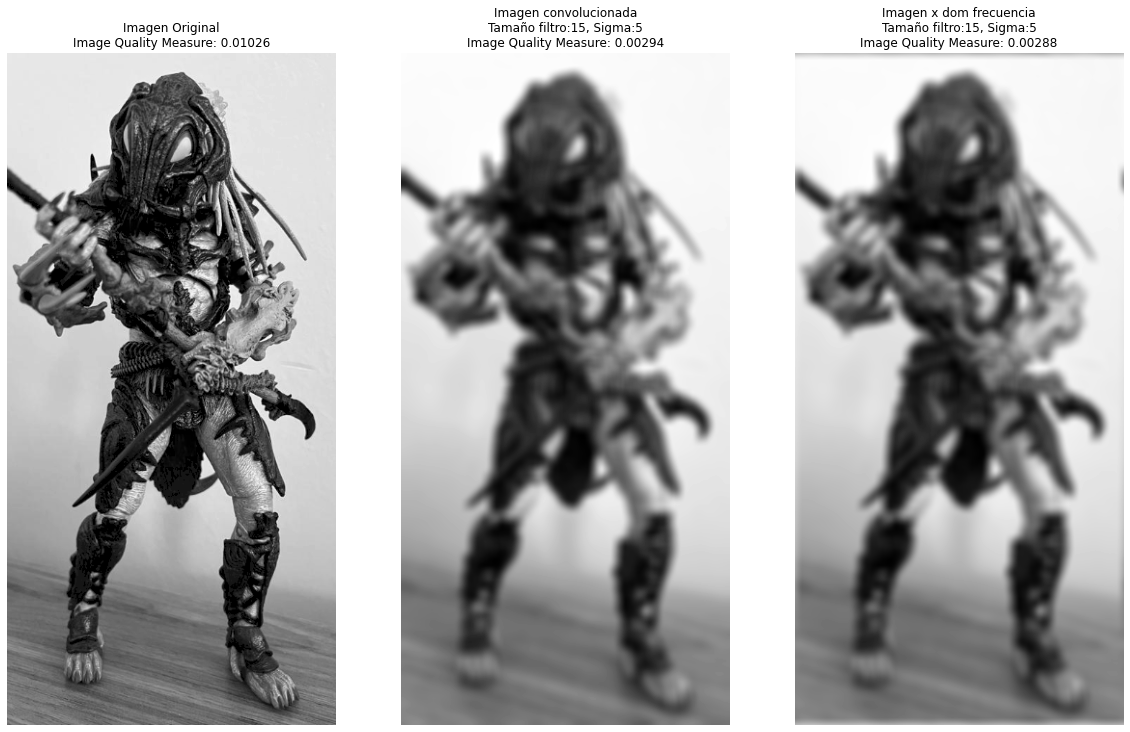

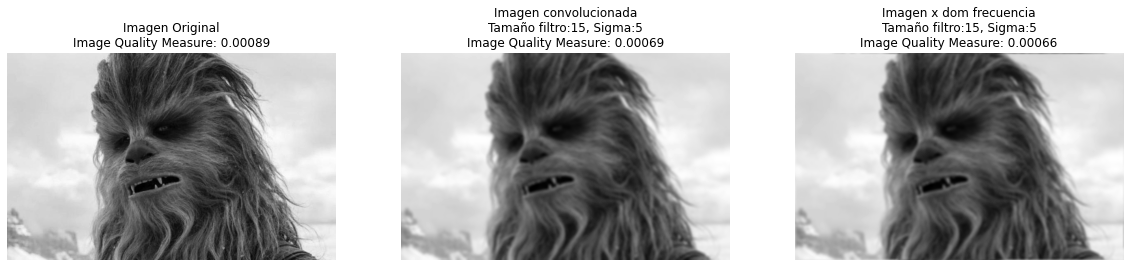

In [10]:
# Se calculan y se muestran las imágenes difuminadas por el método convulucional espacial y el método de la transformada.

s = 5
k = 15
imagenes_cc =  ['fft_alfa_pred.png', 'chewbacca.jpg']

for imagenx in imagenes_cc:
    i = 0 # indice para guardar datos de cada imagen y poder compararlas
    
    # Leo la imagen
    imagen = cv.imread(imagenx, cv.IMREAD_GRAYSCALE)       
    h, w = imagen.shape

    # Se convoluciona la imagen con un filtro gaussiano para difuminarla
    imagen_convol = cv.GaussianBlur(imagen, (k, k), s)

    # Calcula el filtro gaussiano
    imagen_gauss_filter, imagen_gauss_filter_fft = create_gauss_filter(h, w, k, s)
    
    iqm_imagen_original = image_quality_measure(imagen)

    # Muestra la imagen original
    plt.figure(figsize=(20, 20))
    plt.subplot(1,3,1)
    plt.axis('off')
    plt.title(f'Imagen Original\nImage Quality Measure: {np.round(iqm_imagen_original, 5)}')
    plt.imshow(imagen, cmap='gray')

    # Muestra la imagen convolucionada    
    iqm_imagen_convol = image_quality_measure(imagen_convol)
    plt.subplot(1,3,2)
    plt.axis('off')
    plt.title(f'Imagen convolucionada\nTamaño filtro:{k}, Sigma:{s}\nImage Quality Measure: {np.round(iqm_imagen_convol, 5)}')
    plt.imshow(imagen_convol, cmap='gray')

    # Difumina la imagen multiplicando el filtro gaussiano, previamente calculado, con la imagen original
    imagen_fft = np.fft.fft2(imagen)
    filtered = imagen_fft * imagen_gauss_filter_fft
    imagen_gauss_filtrada = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

    # Muestra la imagen difuminada en el dominio espectral
    iqm_imagen_gauss_filtrada = image_quality_measure(imagen_gauss_filtrada)
    plt.subplot(1,3,3)
    plt.axis('off')
    plt.title(f'Imagen x dom frecuencia\nTamaño filtro:{k}, Sigma:{s}\nImage Quality Measure: {np.round(iqm_imagen_gauss_filtrada, 5)}')
    plt.imshow(imagen_gauss_filtrada, cmap='gray')
    
    # Guarda datos para presentacion y calculos posteriores
    df_imagenes = df_imagenes.append({'Nombre': imagenx,
                                      'Imagen' : imagen,
                                      'Convolucion' : imagen_convol, 
                                      'fft': imagen_gauss_filtrada,
                                      'IQM_Original' : iqm_imagen_original,
                                      'IQM_Conv' : iqm_imagen_convol, 
                                      'IQM_gauss': iqm_imagen_gauss_filtrada}, ignore_index=True)
    

In [11]:
# Comparación de imagenes por el método LAP2
print('Comparación de imágenes por image quality measure)\n')
for i in range(len(df_imagenes)):
    print(f'Archivo {df_imagenes.iloc[i].Nombre} original (para referencia): {round(df_imagenes.iloc[i].IQM_Original, 5)}')
    print(f'Archivo {df_imagenes.iloc[i].Nombre} por convolución : {round(df_imagenes.iloc[i].IQM_Conv, 5)}')
    print(f'Archivo {df_imagenes.iloc[i].Nombre} por fft  :  {round(df_imagenes.iloc[i].IQM_gauss, 5)}')
    print('------------------------------------------------------------------------------------------------')

Comparación de imágenes por image quality measure)

Archivo fft_alfa_pred.png original (para referencia): 0.01026
Archivo fft_alfa_pred.png por convolución : 0.00294
Archivo fft_alfa_pred.png por fft  :  0.00288
------------------------------------------------------------------------------------------------
Archivo chewbacca.jpg original (para referencia): 0.00089
Archivo chewbacca.jpg por convolución : 0.00069
Archivo chewbacca.jpg por fft  :  0.00066
------------------------------------------------------------------------------------------------


#### Resultados y conclusiones punto 2

En la comparación utilizando el método "Image Sharpness Measure for Blurred Images in Frequency Domain" (Medida de nitidez de imagen para imágenes borrosas en el dominio de frecuencia) se puede observa que la imagen lograda por el método de multiplicación por fft es mas borrosa que la imagen lograda por convolución, de todas maneras esta diferencia es muy pequeña. Esta pequeña diferencia no es sufiente para notarlo cuando se grafican las dos imágenes.


#### 3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of focus measure operators in shape-from-focus”

##### Se implementan los métodos LAP2 (Modifies Laplacian) y LAP3 (Diagonal Laplacian) del paper “Analysis of focus measure operators in shape-from-focus”

#### Modified Laplacian (LAP2)

<div>
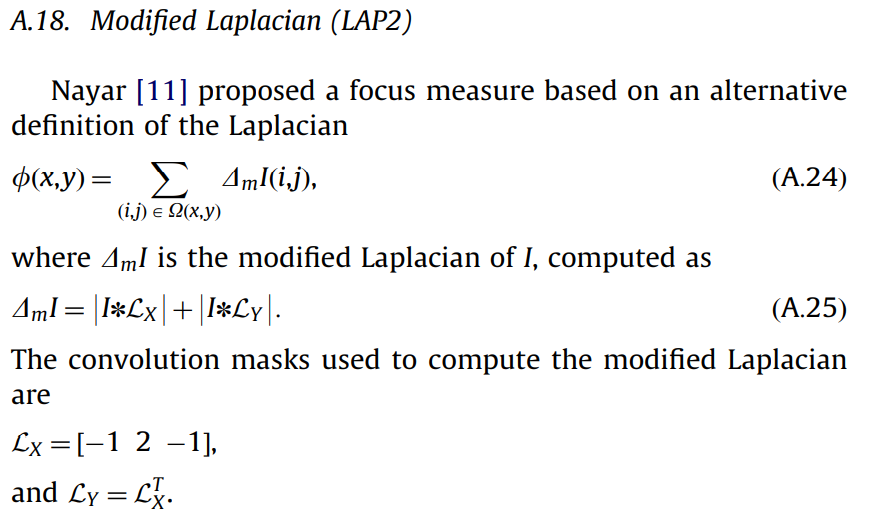
</div>

In [12]:
# Se calcula la métrica LAP2 de acuerdo al paper Analysis of focus measure operators in shape-from-focus”
# imagen : Es la matriz del archivo de imagen
# Devuelve : La media de la suma de los lapacianos

def LAP2(imagen):
    # Defino la mascara de convolución para calcular el Laplaciano modificado 
    mascara = np.array([-1, 2, -1])
    # Calculo las convoluciones 
    laplacianoX = np.abs(cv.filter2D(imagen, -1, mascara))
    laplacianoY = np.abs(cv.filter2D(imagen, -1, mascara.T))
    # En lugar de la suma de los laplacianos se usa la media para tener independencia de la dimensión de la imagen,
    # esto es igual a calcular la suma y dividirlo por (filas x columnas) de la matriz de la imagen, 
    # como propone la métrica del punto anterior 
    return np.mean(laplacianoX + laplacianoY)

#### Diagonal Laplacian (LAP3)

<div>
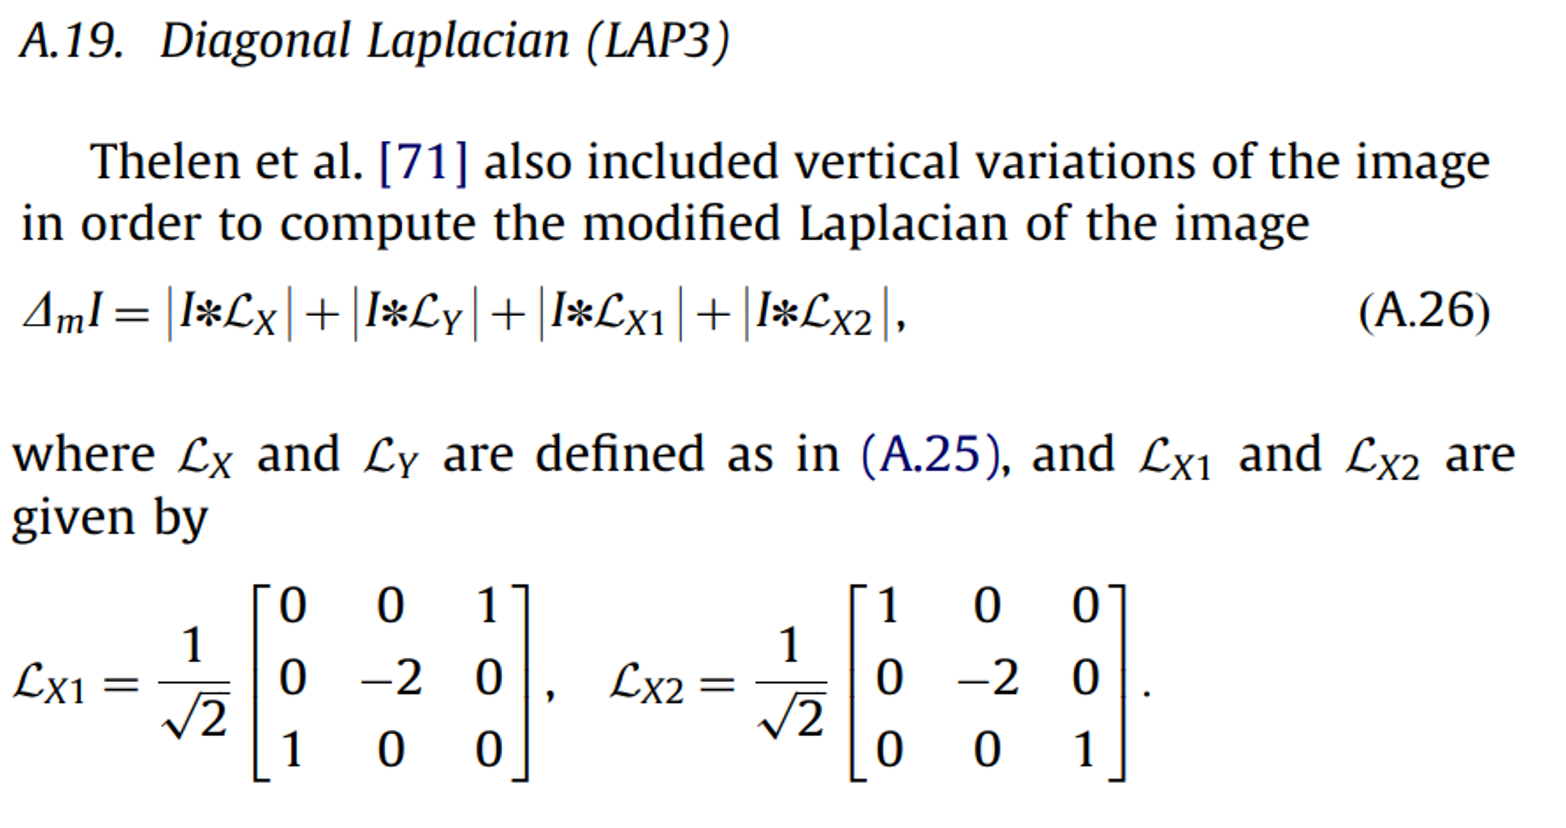
</div>

In [13]:
# Se calcula la métrica LAP3 de acuerdo al paper Analysis of focus measure operators in shape-from-focus”
# imagen : Es la matriz del archivo de imagen
# Devuelve : La media de la suma de los lapacianos

def LAP3(imagen):
    # Defino las mascaras de convolución para calcular el Laplaciano diagonal 
    mascara = np.array([-1, 2, -1])
    mascaraX1 = np.array([[0, 0, 1], [0, -2, 0], [1, 0, 0]]) / np.sqrt(2)
    mascaraX2 = np.array([[1, 0, 0], [0, -2, 0], [0, 0, 1]]) / np.sqrt(2)
    
    # Calculo las convoluciones 
    laplacianoX = np.abs(cv.filter2D(imagen, -1, mascara))
    laplacianoY = np.abs(cv.filter2D(imagen, -1, mascara.T))
    laplacianoX1 = np.abs(cv.filter2D(imagen, -1, mascaraX1))
    laplacianoX2 = np.abs(cv.filter2D(imagen, -1, mascaraX2))  
    # En lugar de la suma de los laplacianos se usa la media para tener independencia de la dimensión de la imagen,
    # esto es igual a calcular la suma y dividirlo por (filas x columnas) de la matriz de la imagen, 
    # como propone la métrica del punto anterior 
    return np.mean(laplacianoX + laplacianoY + laplacianoX1 + laplacianoX2)

In [14]:
# Comparación de imagenes por el método LAP2
print('Comparación de imágenes por método LAP2 (Modified Laplacian)\n')
for i in range(len(df_imagenes)):
    print(f'Archivo {df_imagenes.iloc[i].Nombre} original (para referencia):  {round(LAP2(df_imagenes.iloc[i].Imagen), 4)}')
    print(f'Archivo {df_imagenes.iloc[i].Nombre} por convolución :  {round(LAP2(df_imagenes.iloc[i].Convolucion), 4)}')
    print(f'Archivo {df_imagenes.iloc[i].Nombre} por fft  :  {round(LAP2(df_imagenes.iloc[i].fft), 4)}')
    print('------------------------------------------------------------------------------------------------')

Comparación de imágenes por método LAP2 (Modified Laplacian)

Archivo fft_alfa_pred.png original (para referencia):  9.8994
Archivo fft_alfa_pred.png por convolución :  0.5766
Archivo fft_alfa_pred.png por fft  :  0.8659
------------------------------------------------------------------------------------------------
Archivo chewbacca.jpg original (para referencia):  2.3591
Archivo chewbacca.jpg por convolución :  0.4553
Archivo chewbacca.jpg por fft  :  0.3572
------------------------------------------------------------------------------------------------


In [16]:
# Comparación de imagenes por el método LAP3
print('Comparación de imágenes por método LAP3 (Diagonal Laplacian)\n')
for i in range(len(df_imagenes)):
    print(f'Archivo {df_imagenes.iloc[i].Nombre} original (para referencia):  {round(LAP3(df_imagenes.iloc[i].Imagen), 4)}')
    print(f'Archivo {df_imagenes.iloc[i].Nombre} por convolución :  {round(LAP3(df_imagenes.iloc[i].Convolucion), 4)}')
    print(f'Archivo {df_imagenes.iloc[i].Nombre} por fft  :  {round(LAP3(df_imagenes.iloc[i].fft), 4)}')
    print('------------------------------------------------------------------------------------------------')

Comparación de imágenes por método LAP3 (Diagonal Laplacian)

Archivo fft_alfa_pred.png original (para referencia):  20.5836
Archivo fft_alfa_pred.png por convolución :  1.3053
Archivo fft_alfa_pred.png por fft  :  2.0971
------------------------------------------------------------------------------------------------
Archivo chewbacca.jpg original (para referencia):  5.5831
Archivo chewbacca.jpg por convolución :  0.9618
Archivo chewbacca.jpg por fft  :  0.8533
------------------------------------------------------------------------------------------------


#### Resultados y conclusiones punto 3

Las métricas LAP2 (Modified Laplacian) y LAP3 (Diagonal Laplacian) siguen la suposición de que las imágenes enfocadas presentan bordes más nítidos que las borrosas. El objetivo de estos operadores es medir la cantidad de bordes presentes en las imágenes, que en estas métricas se realiza a través de la segunda derivado discreta o laplaciano. Un valor mas grande indica mayor cantidad de bordes y por lo tanto una imagen mas nítida. 
La métrica LAP2 (Modified Laplacian) usa un kernel de convolución de una sola dimensión, mientras que la métrica LAP3 (Diagonal Laplacian) usa un kernel de dos dimensiones, lo que permite incluir las variaciones verticales en la imagen. 

Tanto la métrica LAP2 como con la métrica LAP3 indican que la imagen del depredador difuminada por convolución tiene mayor nivel de borrosidad que la difuminada por fft. \
Respecto a la imagen de Chewbacca, la imagen difuminada por convolución tiene mayor nivel de borrosidad que la difuminada por fft.\
En ambos casos las diferencias entre niveles de borrosidad de cada imagen difuminada es muy baja.
